# 2. Generalization and overfitting

## 2.1. Learning curves

### (A)
Let's investigate how different sizes of the training set affect the results. So far you have been using a training set of 100 samples. Are these good values? Maybe we can do with less samples, or we can improve if we add more? 

### EXERCISE:
Use the provided script `learning_curve()` in `# SECTION 2` of the `segmentation_tests.py` module. Run the script, which will produce a plot of the error against the size of the training set. What training set size would you say is good enough, i.e. the performance does not increase a lot afterwards? What about if you load the brain data instead of the Gaussian datasets?

In [ ]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import learning_curve

learning_curve()

### (B)
### EXERCISE:
Modify the `learning_curve()` script so that it also plots the training error.

In [ ]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import learning_curve

learning_curve()

### QUESTION:
From what you learned in class, how do you expect the training error plot to look like for 1-NN classifier?

### (C)
### QUESTION:
The 1-NN classifier suffers from overfitting: there is a gap between the training error and the test error. Try other values of $k$ and observe how the learning curves change. What happens?

## 2.2. Learning curves: pen and paper exercise

Consider the following figures, which show the so called "banana dataset", and learning curves A, B and C for this dataset. These learning curves are made by two of the following three classifiers: a nearest mean classifier, a 1-nearest neighbor classifier, and a 5-nearest neighbor classifier.

<img src="../notebooks/assets/banana_grid.png" width="600" height="600" align="center"/>

Figure: Top left: dataset, Top right: learning curve A, Bottom left: learning curve B,
Bottom right: learning curve C

### (A)
### QUESTION:
Which learning curve belongs to which classifier? Explain why you think this is the case.

### (B)
### QUESTION:
Which learning curve do you think will improve the most if we were to add more training samples? Why?

## 2.3. Feature curve (Optional)

### (A)
### EXERCISE:
In this exercise we will see how the number of features influences the classifier, use the provided `feature_curve()` script in `# SECTION 2` of the `segmentation_tests.py` module for this. The script simply selects the first 1, 2 features and so forth. If you want, you can sort your features first, so they will be added in the order you specified. For example:

```python
feature_order = [3, 1, 2, 5, 4]
X = X[:, feature_order]
```
### QUESTION:
What do you see happening to the errors as the number of features increases? Do you get the best performance with all features, or with less? (This depends on which features you have).

In [ ]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import feature_curve

feature_curve()

### (B)
Using `np.random.randn()`, replace the data by completely noisy features and run the script again. What happens to the errors now? What behavior of the train error might be surprising?

In [ ]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import feature_curve

feature_curve(use_random=True)

### (C)
### QUESTION:
Go to the website [http://tylervigen.com/spurious-correlations](http://tylervigen.com/spurious-correlations) and look at the different plots. Explain in your own words, what the previous part of this question, and the phenomenon you see on the website, have in common.

## 2.4. Distances in high dimensions (Optional)

You might already have the idea that data in high dimensional feature spaces has characteristics that do not correspond to our intuition of how things behave in 2D or 3D. This exercise looks at one of the reasons this happens, by looking at the distribution of the distances.

### (A)
### EXERCISE:
Use the provided `high_dimensions_demo()` script `# SECTION 2` of the `segmentation_tests.py` module to generate 100 samples from a 2D Gaussian distribution, compute all pairwise Euclidean distances and make a histogram of the distances. 

In [ ]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import high_dimensions_demo

high_dimensions_demo()

### QUESTION:
What average, and what maximum distance do you observe? What is the average nearest neighbor distance?

### (B)
### QUESTION:
The second subplot of the resulting figure above shows the result when a 1000D Gaussian distribution is used instead of a 2D one. How do the distances change? What does this tell you about finding nearest neighbors in high dimensions?

## 2.5. More surprising properties of high dimensions (Optional)

Think about 100 uniformly distributed samples on a unit line, unit square, unit cube, etc. If it helps your thinking, think about 100 people standing on a line of 100 meters, on a field of 100x100, or spread out in a 100x100x100 building.

### (A)
### QUESTION:
Let's take the line. How far does a person on average need to travel along the line, to find 1% of the others (i.e. 1 person)?

### (B)
### QUESTION:
What about the square - how far does a person need to travel *in each direction* to find another person? Now it is 10 meters - by travelling 10 meters in each direction, you have covered 100$m^{2}$, which is 1% of the total space available.

### (C)
### QUESTION:
We can calculate this for any dimensionality with the formula $r^m = V$, where $r$ is the fraction that needs to be travelled (i.e. 0.01 for 1%), $m$ is the dimensionality, and $V$ is the volume of the data we are searching for (again 0.01 in this example).

Have a look at the output plots of `high_dimensions_demo()`, which shows the fraction travelled against the number of dimensions, for 1 to 10 dimensions. How far do you need to travel to find a nearest neighbor in 10 dimensions? What does this mean for the concept of "neighborhood" in high-dimensional spaces?

## 2.6. Principal component analysis

### (A)
### EXERCISE:
Use the following:

```python
generate_gaussian_data(100, [0, 0], [0, 0], [[3, 1],[1, 1]], [[3, 1],[1, 1]])
```

to generate a dataset with correlated features. Calculate the mean and covariance matrix of the data using `mean` and `cov` and compare them to the parameters you used as input. Write your implementation in `covariance_matrix_test()` in `# SECTION 2` of the `segmentation_tests.py` module.

In [ ]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import covariance_matrix_test
X, Y, sigma = covariance_matrix_test()

### QUESTION:
Is there a difference? How could you increase or decrease this difference?

### (B)
### EXERCISE:
Compute the eigenvectors and eigenvalues of the covariance matrix using:

```python
w, v = np.linalg.eig(cov)
````

(the column `v[:,i]` is the eigenvector corresponding to the eigenvalue `w[i]`).

Inspect the eigenvectors and eigenvalues. What two properties can you name about the eigenvectors? How can you verify these properties (describe the operations, or give a line of Python code). For the eigenvalues, which eigenvalue is the largest and which is the smallest?

You can sort the eigenvalues and eigenvectors as follows:

```python
ix = np.argsort(w)[::-1] #Find ordering of eigenvalues
w = w[ix] #Reorder eigenvalues
v = v[:, ix] #Reorder eigenvectors
```

Write your implementation in `eigen_vecval_test()` in `# SECTION 2` of the `segmentation_tests.py` module.

In [ ]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import eigen_vecval_test
v, w = eigen_vecval_test(sigma)

### (C)
### EXERCISE:
Rotate the data using `v`. This is similar to what you did in the registration project, only now instead of getting the angle of rotation, `v` is already the rotation matrix.

In [ ]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
sys.path.append("../code")
from segmentation_tests import rotate_using_eigenvectors_test

X_rotated = rotate_using_eigenvectors_test(X, Y, v)

plt.plot(X)
plt.show()
plt.plot(X_rotated)
plt.show()

### QUESTION:
In most literature you will see the notation $v^{T}*X$, but this will not work on our dataset because of how the dataset is defined (rows = samples, columns = dimensions). Instead use $X_{pca}=v^{T}*X^{T}$ and $X_{pca}=X_{pca}^{T}$. What can you say about the covariance matrix of `Xpca`?

### (D)
### EXERCISE:
Complete the missing functionality in the function `mypca()` in `# SECTION 2` of the `segmentation.py` module. Test the function by running the `test_mypca()` script located in the `segmentation_tests.py` module. This will plot the original data, and the data after `test_mypca()` is applied. Here is how the result might look:

<img src="../notebooks/assets/test_mypca.png" width="800" align="center"/>


[[0.88739836]
 [1.        ]]


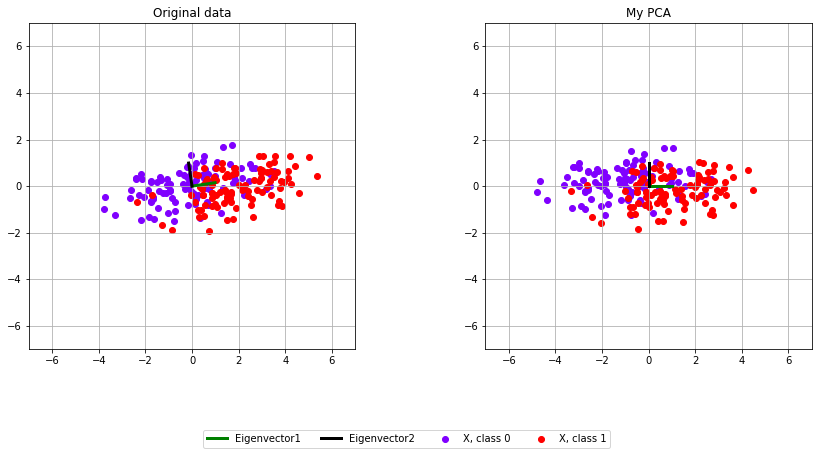

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import test_mypca

test_mypca()

### (E)
### QUESTION:
You might have noticed when editing `mypca()` that there is an additional output, `fraction_variance`. This vector stores how much variance is accounted for by the first, first two, first three etc principal components. How much variance is the first principal component responsible for in the Gaussian data you just generated? How would you need to modify the covariance matrix of the data, in order to decrease the amount of variance in the first principal component? You can test your hypothesis by modifying the properties of the Gaussian data created at the start of `test_mypca()`.

Note that not any matrix is a valid covariance matrix so if you just enter random numbers you are likely to get an error. To start, the matrix needs to be symmetric, and the diagonal values need to be positive. Furthermore, the covariance cannot be large if the variance is small.  You can read about how to verify this here: [https://math.stackexchange.com/questions/1522397/how-to-tell-is-a-matrix-is-a-covariance-matrix](https://math.stackexchange.com/questions/1522397/how-to-tell-is-a-matrix-is-a-covariance-matrix).

## 2.7. k - Different features, different samples

### (A)
Recall that $k$-NN is sensitive to scaling. Because of this, some features will have a much bigger influence on the classifier than the others. To remove such differences, features are often normalized to "zero mean, unit variance", as in the `normalize_data` function. This can be done in two ways:

- Normalizing ALL data, before splitting it up into training and test data
- Normalizing the training data, and then applying the same normalization to the test data, by providing the test data as the second input to the `normalize_data` function.

It is NOT correct to normalize the training and test data separately. To understand why, think of the Alice/Bob/Carol data as the training set, and Dave and Earl as the test set:


|  person | weight (kg)| height (m)|
|---------|------------|-----------|
| Alice | 55 | 1.6 |
| Bob | 60 | 1.7 |
| Carol | 65 | 1.8 |


|  person | weight (kg)| height (m)|
|---------|------------|-----------|
| Dave | 65 | 1.8 |
| Earl | 75 | 1.9 |

### QUESTION:
What goes wrong if you normalize these datasets separately?

### (B)
So far you have been using all the features for the classifier, but it is possible to only select a subset. You can experiment with this as follows:

```python
# Normalize data
train_data, test_data = seg.normalize_data(train_data, test_data)
# Define which features to select
ix = [1, 2, 4]
# Train the classifier
pred_labels = seg.knn_classifier(train_data[:, ix], train_labels, test_data[:, ix], k=1)
```

### QUESTION:
Think about the scatterplots you created last week, and which features seemed to be better for the brain/non brain problem. Experiment with selecting one or more of these features. Do not forget to normalize your data first. Can you improve your classifier performance? How many possible combinations of features are there in total?

### (C)
### (OPTIONAL) EXERCISE:
To avoid trying all combinations you could create a "forward feature selection" loop where you first select the best feature, based on its performance on the training set (NOT the test set - you can only use it to evaluate the final classier), then select the feature that gives the best combination with the first feature and so forth.

### (D)
Instead of selecting features, let's experiment with extracting features with PCA. For a training and a test set, this is similar to scaling features: perform PCA on all data together, or perform PCA only on the training set, and then apply the same rotation to the test set:

```python
X_pca, v, w, fraction_variance = seg.mypca(train_data)
test_pca = v.T.dot(test_data.T)
test_pca = test_pca.T
```

### QUESTION:
How many principal components do you need to retain at least 0.9 fraction of variance? How does the performance compare to using all features, and to using your feature subset you selected yourself?